# Classification Task MLP
## Import Libraries

In [ ]:
!pip install -q scikit-learn tensorflow torch torchvision torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.3 MB/s eta 0:00:00


## Importing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KlasifikasiUTS.csv to KlasifikasiUTS.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
X = df.drop(columns=['Class'])
y = df['Class']

## Preprocessing data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## Define the MLP Model

In [ ]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_tf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_tf.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=256, callbacks=[early_stop])

Epoch 1/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9768 - loss: 0.0902 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 0.9994 - val_loss: 0.0042
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.

## Train using PyTorch MLP

In [ ]:
X_train_t = torch.FloatTensor(X_train)
X_test_t = torch.FloatTensor(X_test)
y_train_t = torch.FloatTensor(y_train.values).unsqueeze(1)
y_test_t = torch.FloatTensor(y_test.values).unsqueeze(1)

In [ ]:
train_data = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_data, batch_size=256, shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
model_pt = MLP()
criterion = nn.BCELoss()
optimizer = optim.AdamW(model_pt.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
for epoch in range(10):
    model_pt.train()
    total_loss = 0
    for xb, yb in train_loader:
        pred = model_pt(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 28.0986
Epoch 2, Loss: 3.4719
Epoch 3, Loss: 3.1018
Epoch 4, Loss: 2.9352
Epoch 5, Loss: 2.6782
Epoch 6, Loss: 2.4777
Epoch 7, Loss: 2.4621
Epoch 8, Loss: 2.3259
Epoch 9, Loss: 2.2580
Epoch 10, Loss: 2.2316


## Evaluate TensorFlow

In [ ]:
y_pred_tf = (model_tf.predict(X_test) > 0.5).astype("int32")
print("TF Accuracy:", accuracy_score(y_test, y_pred_tf))
print("TF Precision:", precision_score(y_test, y_pred_tf))
print("TF Recall:", recall_score(y_test, y_pred_tf))
print("TF F1:", f1_score(y_test, y_pred_tf))
print("TF AUC:", roc_auc_score(y_test, model_tf.predict(X_test)))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
TF Accuracy: 0.9993328885923949
TF Precision: 0.875
TF Recall: 0.7142857142857143
TF F1: 0.7865168539325843
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
TF AUC: 0.9770232305077349


## Show the Confusion Matrix and ROC curve

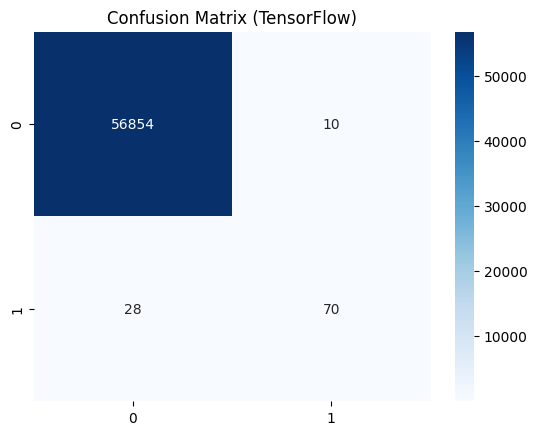

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_tf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (TensorFlow)")
plt.show()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


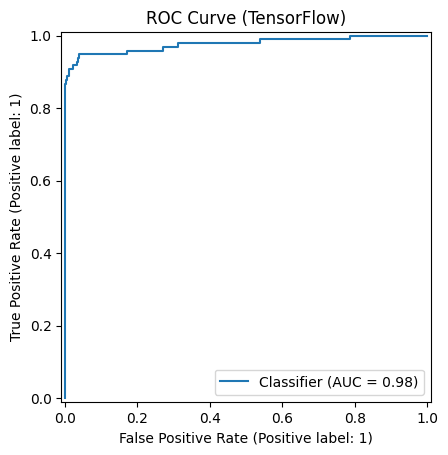

In [ ]:
RocCurveDisplay.from_predictions(y_test, model_tf.predict(X_test))
plt.title("ROC Curve (TensorFlow)")
plt.show()

## Evaluate PyTorch

In [ ]:
model_pt.eval()
with torch.no_grad():
    y_pred_pt = model_pt(X_test_t).numpy()
    y_pred_pt_bin = (y_pred_pt > 0.5).astype("int32")

In [ ]:
print("PT Accuracy:", accuracy_score(y_test, y_pred_pt_bin))
print("PT Precision:", precision_score(y_test, y_pred_pt_bin))
print("PT Recall:", recall_score(y_test, y_pred_pt_bin))
print("PT F1:", f1_score(y_test, y_pred_pt_bin))
print("PT AUC:", roc_auc_score(y_test, y_pred_pt))

PT Accuracy: 0.9993328885923949
PT Precision: 0.7941176470588235
PT Recall: 0.826530612244898
PT F1: 0.81
PT AUC: 0.9765092939257864


## Show the Confusion Matrix and ROC curve

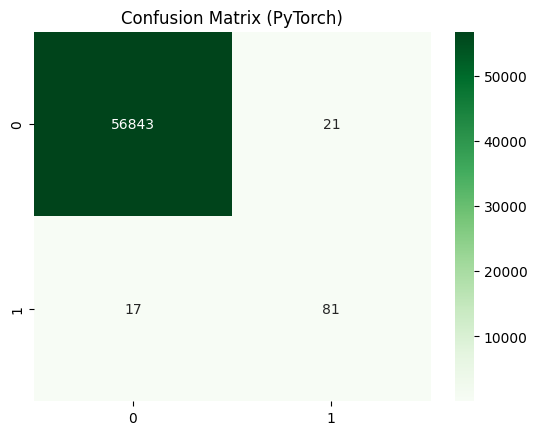

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_pt_bin), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (PyTorch)")
plt.show()

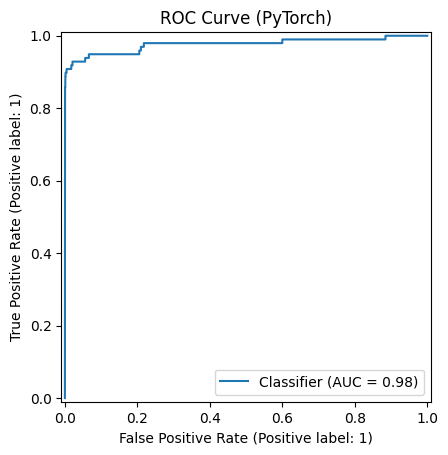

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred_pt)
plt.title("ROC Curve (PyTorch)")
plt.show()